## 230968336
## SAMEER RAJ
## WEEK-3
## DATASET-1

## Q1. Understanding the Dataset and Pre-processing

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
classes = ["Airplane","Automobile","Bird","Cat","Deer",
           "Dog","Frog","Horse","Ship","Truck"]
print("Number of classes:", len(classes))
print("Class names:", classes)

Number of classes: 10
Class names: ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


In [23]:
print("Image shape:", x_train[0].shape)

Image shape: (32, 32, 3)


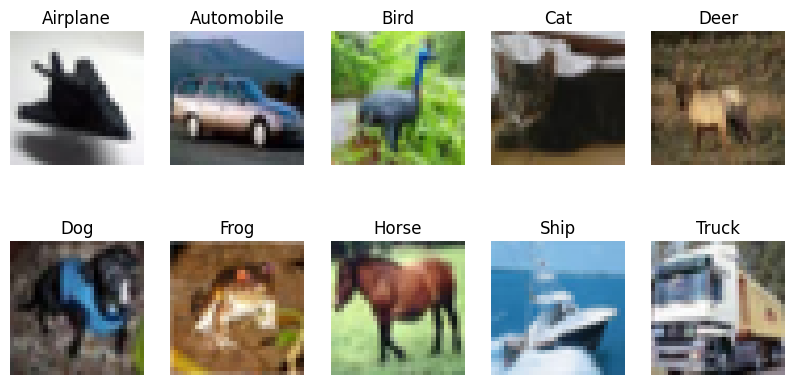

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, cls in enumerate(classes):
    idx = np.where(y_train.flatten() == i)[0][0]
    axes[i//5, i%5].imshow(x_train[idx])
    axes[i//5, i%5].set_title(cls)
    axes[i//5, i%5].axis("off")
plt.show()

In [25]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train_fcnn = x_train.reshape(-1, 32*32*3)
x_test_fcnn = x_test.reshape(-1, 32*32*3)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Data ready: FCNN input shape:", x_train_fcnn.shape)

Data ready: FCNN input shape: (50000, 3072)


## Q2. FCNN

In [26]:
fcnn = Sequential([
    Dense(1024, activation="relu", input_shape=(32*32*3,)),   # large first layer
    Dropout(0.5),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

In [27]:
fcnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
history_fcnn = fcnn.fit(x_train_fcnn, y_train_cat,
                        epochs=20, batch_size=128,
                        validation_data=(x_test_fcnn, y_test_cat),
                        verbose=2)


Epoch 1/20
391/391 - 21s - 55ms/step - accuracy: 0.2105 - loss: 2.1085 - val_accuracy: 0.2818 - val_loss: 1.9373
Epoch 2/20
391/391 - 18s - 46ms/step - accuracy: 0.2532 - loss: 1.9886 - val_accuracy: 0.2957 - val_loss: 1.9518
Epoch 3/20
391/391 - 17s - 43ms/step - accuracy: 0.2650 - loss: 1.9545 - val_accuracy: 0.3226 - val_loss: 1.8765
Epoch 4/20
391/391 - 16s - 41ms/step - accuracy: 0.2827 - loss: 1.9178 - val_accuracy: 0.3356 - val_loss: 1.9072
Epoch 5/20
391/391 - 15s - 38ms/step - accuracy: 0.2957 - loss: 1.8980 - val_accuracy: 0.3222 - val_loss: 1.8938
Epoch 6/20
391/391 - 15s - 39ms/step - accuracy: 0.2978 - loss: 1.8879 - val_accuracy: 0.3410 - val_loss: 1.8943
Epoch 7/20
391/391 - 15s - 39ms/step - accuracy: 0.3029 - loss: 1.8805 - val_accuracy: 0.3501 - val_loss: 1.8744
Epoch 8/20
391/391 - 15s - 39ms/step - accuracy: 0.3106 - loss: 1.8654 - val_accuracy: 0.3403 - val_loss: 1.8739
Epoch 9/20
391/391 - 16s - 40ms/step - accuracy: 0.3110 - loss: 1.8625 - val_accuracy: 0.3518 - 

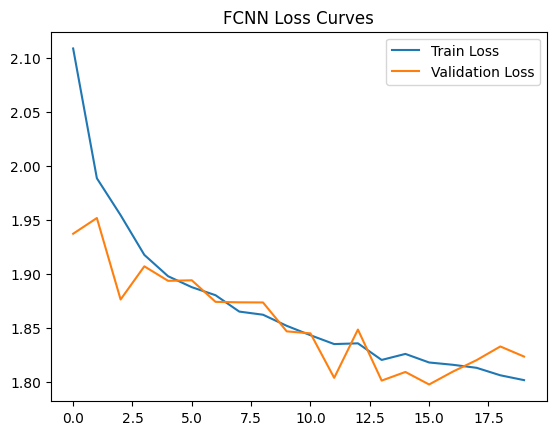

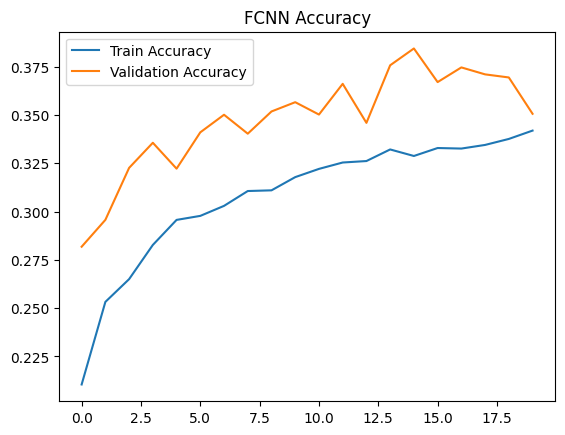

In [29]:
plt.plot(history_fcnn.history['loss'], label="Train Loss")
plt.plot(history_fcnn.history['val_loss'], label="Validation Loss")
plt.legend(); plt.title("FCNN Loss Curves"); plt.show()

plt.plot(history_fcnn.history['accuracy'], label="Train Accuracy")
plt.plot(history_fcnn.history['val_accuracy'], label="Validation Accuracy")
plt.legend(); plt.title("FCNN Accuracy"); plt.show()

In [32]:
test_loss, test_acc = fcnn.evaluate(x_test_fcnn, y_test_cat, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.350600004196167


In [33]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

## CNN-1

In [34]:
cnn1 = Sequential([
    Conv2D(32, (5,5), strides=1, padding="valid", activation="relu", input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])


C:\Users\samee\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
cnn1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history_cnn1 = cnn1.fit(x_train, y_train_cat,
                        epochs=20, batch_size=128,
                        validation_data=(x_test, y_test_cat),
                        verbose=2)

test_loss1, test_acc1 = cnn1.evaluate(x_test, y_test_cat, verbose=0)
print("CNN-1 Test Accuracy:", test_acc1)

Epoch 1/20
391/391 - 10s - 25ms/step - accuracy: 0.4252 - loss: 1.6059 - val_accuracy: 0.5183 - val_loss: 1.3606
Epoch 2/20
391/391 - 8s - 19ms/step - accuracy: 0.5473 - loss: 1.2832 - val_accuracy: 0.5695 - val_loss: 1.2325
Epoch 3/20
391/391 - 7s - 19ms/step - accuracy: 0.5883 - loss: 1.1762 - val_accuracy: 0.5824 - val_loss: 1.1859
Epoch 4/20
391/391 - 7s - 19ms/step - accuracy: 0.6159 - loss: 1.1015 - val_accuracy: 0.6125 - val_loss: 1.1102
Epoch 5/20
391/391 - 7s - 18ms/step - accuracy: 0.6414 - loss: 1.0301 - val_accuracy: 0.6357 - val_loss: 1.0686
Epoch 6/20
391/391 - 7s - 19ms/step - accuracy: 0.6526 - loss: 0.9937 - val_accuracy: 0.6374 - val_loss: 1.0568
Epoch 7/20
391/391 - 7s - 18ms/step - accuracy: 0.6718 - loss: 0.9404 - val_accuracy: 0.6310 - val_loss: 1.0779
Epoch 8/20
391/391 - 7s - 19ms/step - accuracy: 0.6840 - loss: 0.9098 - val_accuracy: 0.6348 - val_loss: 1.0589
Epoch 9/20
391/391 - 7s - 19ms/step - accuracy: 0.6931 - loss: 0.8774 - val_accuracy: 0.6469 - val_loss

## CNN-2

In [36]:
cnn2 = Sequential([
    Conv2D(32, (3,3), strides=1, padding="valid", activation="relu", input_shape=(32,32,3)),
    Conv2D(32, (3,3), strides=1, padding="valid", activation="relu"),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [37]:
cnn2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history_cnn2 = cnn2.fit(x_train, y_train_cat,
                        epochs=20, batch_size=128,
                        validation_data=(x_test, y_test_cat),
                        verbose=2)

test_loss2, test_acc2 = cnn2.evaluate(x_test, y_test_cat, verbose=0)
print("CNN-2 Test Accuracy:", test_acc2)

Epoch 1/20
391/391 - 15s - 39ms/step - accuracy: 0.4623 - loss: 1.5128 - val_accuracy: 0.5757 - val_loss: 1.2065
Epoch 2/20
391/391 - 14s - 35ms/step - accuracy: 0.6061 - loss: 1.1210 - val_accuracy: 0.6163 - val_loss: 1.0883
Epoch 3/20
391/391 - 13s - 33ms/step - accuracy: 0.6591 - loss: 0.9748 - val_accuracy: 0.6419 - val_loss: 1.0236
Epoch 4/20
391/391 - 13s - 34ms/step - accuracy: 0.6939 - loss: 0.8820 - val_accuracy: 0.6659 - val_loss: 0.9597
Epoch 5/20
391/391 - 15s - 39ms/step - accuracy: 0.7174 - loss: 0.8157 - val_accuracy: 0.6716 - val_loss: 0.9620
Epoch 6/20
391/391 - 16s - 40ms/step - accuracy: 0.7396 - loss: 0.7473 - val_accuracy: 0.6714 - val_loss: 0.9602
Epoch 7/20
391/391 - 14s - 36ms/step - accuracy: 0.7586 - loss: 0.6936 - val_accuracy: 0.6768 - val_loss: 0.9520
Epoch 8/20
391/391 - 19s - 50ms/step - accuracy: 0.7804 - loss: 0.6381 - val_accuracy: 0.6821 - val_loss: 0.9644
Epoch 9/20
391/391 - 13s - 33ms/step - accuracy: 0.7978 - loss: 0.5880 - val_accuracy: 0.6790 - 

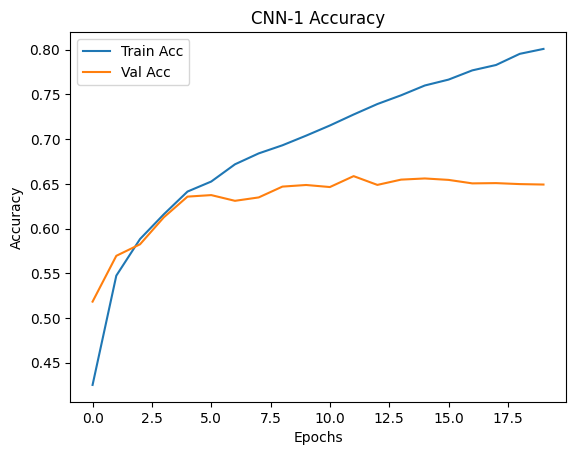

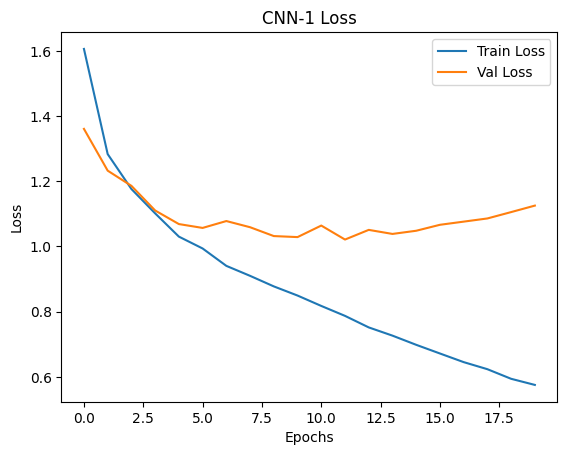

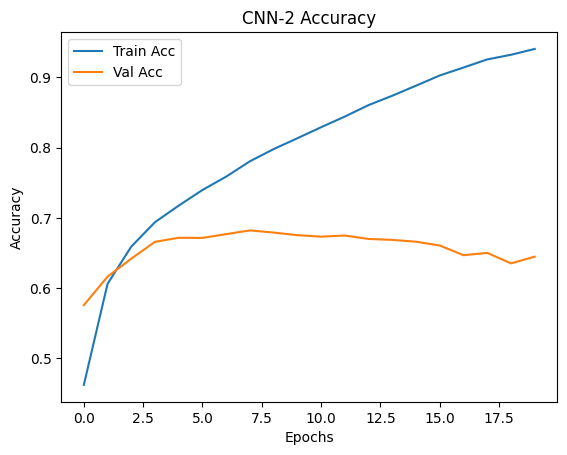

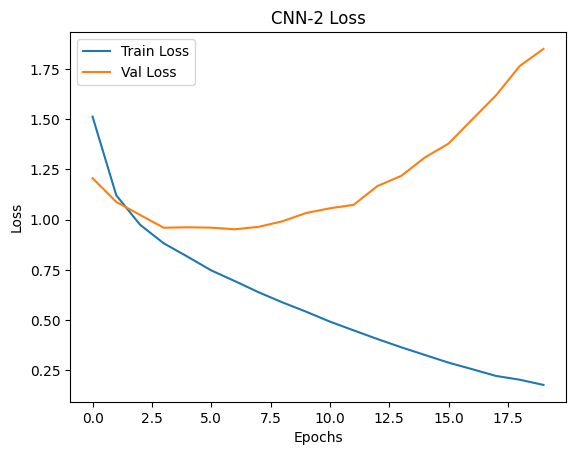

In [39]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label="Train Acc")
    plt.plot(history.history['val_accuracy'], label="Val Acc")
    plt.title(title + " Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Val Loss")
    plt.title(title + " Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_history(history_cnn1, "CNN-1")
plot_history(history_cnn2, "CNN-2")

In [40]:
print("\n=== Final Model Comparison ===")
print("FCNN Test Accuracy :", test_acc)
print("CNN-1 Test Accuracy:", test_acc1)
print("CNN-2 Test Accuracy:", test_acc2)

if test_acc1 > test_acc2:
    print("CNN-1 performed better than CNN-2.")
elif test_acc2 > test_acc1:
    print("CNN-2 performed better than CNN-1.")
else:
    print("CNN-1 and CNN-2 performed equally.")


=== Final Model Comparison ===
FCNN Test Accuracy : 0.350600004196167
CNN-1 Test Accuracy: 0.6492000222206116
CNN-2 Test Accuracy: 0.6446999907493591
CNN-1 performed better than CNN-2.


In [42]:
print("\n=== Performance Comparison ===")
print("FCNN Test Accuracy :", test_acc)
print("CNN-1 Test Accuracy:", test_acc1)
print("CNN-2 Test Accuracy:", test_acc2)


=== Performance Comparison ===
FCNN Test Accuracy : 0.350600004196167
CNN-1 Test Accuracy: 0.6492000222206116
CNN-2 Test Accuracy: 0.6446999907493591


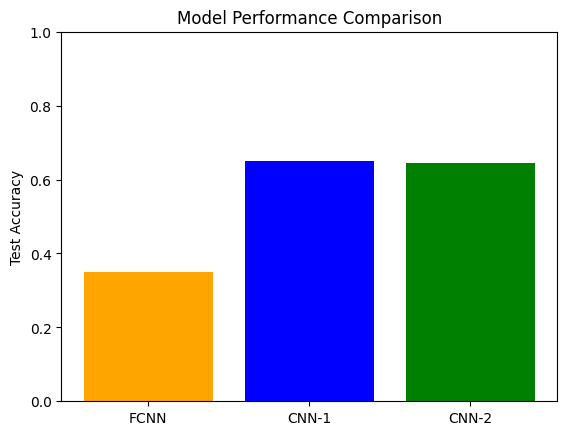

In [43]:
models = ["FCNN", "CNN-1", "CNN-2"]
accuracies = [test_acc, test_acc1, test_acc2]

plt.bar(models, accuracies, color=["orange","blue","green"])
plt.title("Model Performance Comparison")
plt.ylabel("Test Accuracy")
plt.ylim(0,1)
plt.show()

In [44]:
print("\n=== FCNN Summary ===")
fcnn.summary()

print("\n=== CNN-1 Summary ===")
cnn1.summary()

print("\n=== CNN-2 Summary ===")
cnn2.summary()


=== FCNN Summary ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,416,352 (43.55 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,610,902 (29.03 MB)


=== CNN-1 Summary ===


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │       627,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,892,228 (7.22 MB)

 Trainable params: 630,742 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,261,486 (4.81 MB)


=== CNN-2 Summary ===


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │       627,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,915,364 (7.31 MB)

 Trainable params: 638,454 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,276,910 (4.87 MB)